In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

2.1.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]
2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

![Overfit](./Overfit.png)

1.From the two figures we can see that the accuracy of training dataset is better than that of testing dataset. The loss of the testing dataset also increases after many steps of iterations. These reflect the overfitting of the model on the training data set.
2.Overfit means that the noise or random fluctuations in the training dataset is picked up and learned as concepts by the model. However, these details do not apply to new datasets and negatively impact the model’s ability to generalize.
3.To avoid overfitting, we can apply cross validation. Basically, the data is split into k folds. We use k-1 folds for training and one fold for testing. This allows us to tune parameters and find the model that best generalize over the dataset. 
We can also train the model with more data as larger amounts of data will help algorithms detect the signal better and avoid overfitting. However, this method doesn't always work if the traing data have too much noise. So we should ensure our data is clean and relavant.

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

![Dropout](./Dropout.png)

Dropout resamples the nodes at each layer for training and reduces to number of parameters to update in each iteration. This procedure is like training lots of different neural networks at the same time. Since different networks overfit in different ways, the dropout layer will reduce overfitting to a great extent. The figures show that the model has similer performance on training dataset and testing dataset, indicating the overfit has been alleviated.

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

Encoder can be used in image or file compression since it can reduce the dimension of the data. Decoder can then be used to restore the file.Another application is to use encoder and decoder together to detect abnormal data points in the set just as what problem 2.3 does.

**2.1 Linear AE points for constructed model, no questions here.**

![2.1](./2.1.png)

**2.2 Convolutional AE points for constructed model, no questions here.**

![2.2](./2.2.png)

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

![2.4](./2.4.png)

![2.4.1](./2.4.1.png)

![2.4loss](./2.4loss.png)

After we do multiple iterations, the loss converges below 0.04.
In the training process, we transfor the input from a 3D tensor to a 2D tensor and then apply CNN. The dimension of the input data is (8,64,313) and we reshape it into (256,626,1) so it is easy to implement maxpooling. We use one Maxpooling and one Upsampling in encoding and secoding. We also use five convolution layers. The number of filters in each convolution layer is determined through trail and error. We choose batch size to be 70 as too large batch size may cause kernel failure. To keep nonlinearity, ReLu is used as the activation function after each layer. The loss function is mean squared error(MSE).The results show that our model can claasify all abnormal data poins and 936 out ouf 1000 normal data points, indicating the performance of the model is satisfactory.

***Reminder: Achieve better than 75 anomalies***

In [3]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
#Normalize
#print(data_train)
data_train = tf.keras.utils.normalize(data_train, axis=-1, order=2)
data_test = tf.keras.utils.normalize(data_test, axis = -1, order = 2)
#Reshape
img_rows = 28
img_cols = 28
data_train = data_train.reshape((data_train.shape[0], img_rows, img_cols,1))
data_test = data_test.reshape((data_test.shape[0], img_rows, img_cols,1))
input_shape = (img_rows, img_cols,1)
#print(input_shape)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

In [4]:
data_train.shape

(60000, 28, 28, 1)

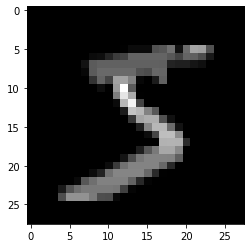

In [5]:
pic1 = data_train[0,:,:,0]
plt.imshow(pic1, cmap='gray')

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [6]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    #### Fill in Model ####
    model = Sequential()
    #1
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape))
    #2
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #4
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #5
    model.add(layers.Flatten())
    #6
    model.add(layers.Dense(100, activation='relu'))
    #7
    model.add(layers.Dense(100, activation='relu'))
    #Output
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax'))
    
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 120us/sample - loss: 0.6338 - accuracy: 0.8160 - val_loss: 0.1450 - val_accuracy: 0.9547
Epoch 2/200
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1112 - accuracy: 0.9653 - val_loss: 0.0749 - val_accuracy: 0.9775
Epoch 3/200
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 4/200
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0486 - val_accuracy: 0.9847
Epoch 5/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 6/200
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0403 - val_accuracy: 0.9868
Epoch 7/200
60000/60000 [========================

In [7]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Loss')

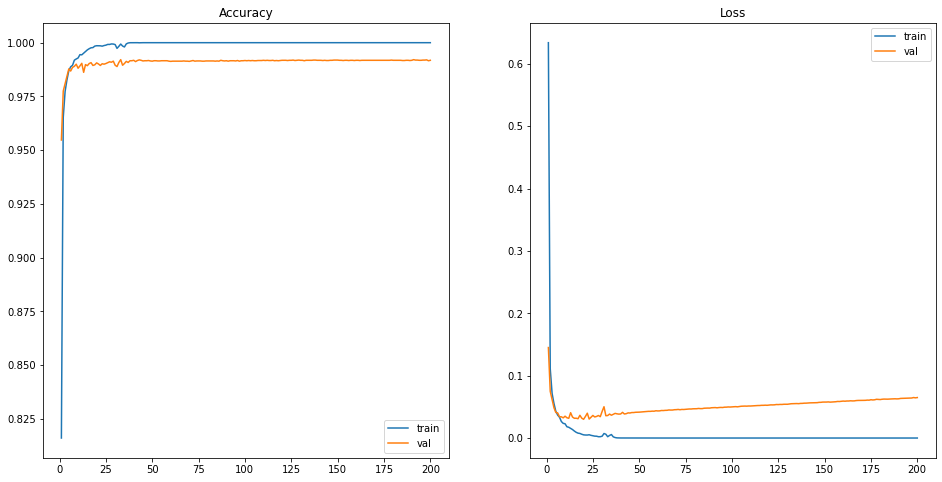

In [8]:
epoch = 200
epoch = np.arange(epoch)+1

plt.figure(figsize=(16,8))
#Plot accuracy vs epoch
plt.subplot(1,2,1)
plt.plot(epoch,history_overfit.history['accuracy'])
plt.plot(epoch,history_overfit.history['val_accuracy'])
plt.title('Accuracy')

plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(1,2,2)
plt.plot(epoch,history_overfit.history['loss'])
plt.plot(epoch,history_overfit.history['val_loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')
#### Fill in plot ####


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [11]:
# insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result.
def CNN_dropout_1():
    
    #### Fill in model ####
    model = Sequential()
    #1
    model.add(layers.Dropout(0.3, input_shape=input_shape))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape))
    #2
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.3))
    #4
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #5
    model.add(layers.Flatten())
    #6
    model.add(layers.Dense(100, activation='relu'))
    #7
    model.add(layers.Dense(100, activation='relu'))
    #Output
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax'))
    return model

#Compile and train the model
CNN_dropout_input = CNN_dropout_1()
CNN_dropout_input.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_input = CNN_dropout_input.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_input = CNN_dropout_input.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_input[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 79us/sample - loss: 0.6248 - accuracy: 0.8076 - val_loss: 0.2191 - val_accuracy: 0.9520
Epoch 2/200
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1457 - accuracy: 0.9554 - val_loss: 0.1496 - val_accuracy: 0.9728
Epoch 3/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1027 - accuracy: 0.9680 - val_loss: 0.1247 - val_accuracy: 0.9779
Epoch 4/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0847 - accuracy: 0.9732 - val_loss: 0.1034 - val_accuracy: 0.9823
Epoch 5/200
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.0982 - val_accuracy: 0.9842
Epoch 6/200
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0625 - accuracy: 0.9801 - val_loss: 0.0887 - val_accuracy: 0.9851
Epoch 7/200
60000/60000 [=========================

In [12]:
#Create and train model architecture
def CNN_dropout_2():
    
    #### Fill in model ####
    model = Sequential()
    #1
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.3))
    #2
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    #3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.3))
    #4
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    #5
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    #6
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    #7
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    #Output
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax'))
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_2()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s 136us/sample - loss: 0.8814 - accuracy: 0.7026 - val_loss: 0.2333 - val_accuracy: 0.9563
Epoch 2/200
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2201 - accuracy: 0.9356 - val_loss: 0.1294 - val_accuracy: 0.9745
Epoch 3/200
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1532 - accuracy: 0.9546 - val_loss: 0.0930 - val_accuracy: 0.9812
Epoch 4/200
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1241 - accuracy: 0.9632 - val_loss: 0.0657 - val_accuracy: 0.9852
Epoch 5/200
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1035 - accuracy: 0.9702 - val_loss: 0.0567 - val_accuracy: 0.9869
Epoch 6/200
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0935 - accuracy: 0.9724 - val_loss: 0.0521 - val_accuracy: 0.9879
Epoch 7/200
60000/60000 [===================

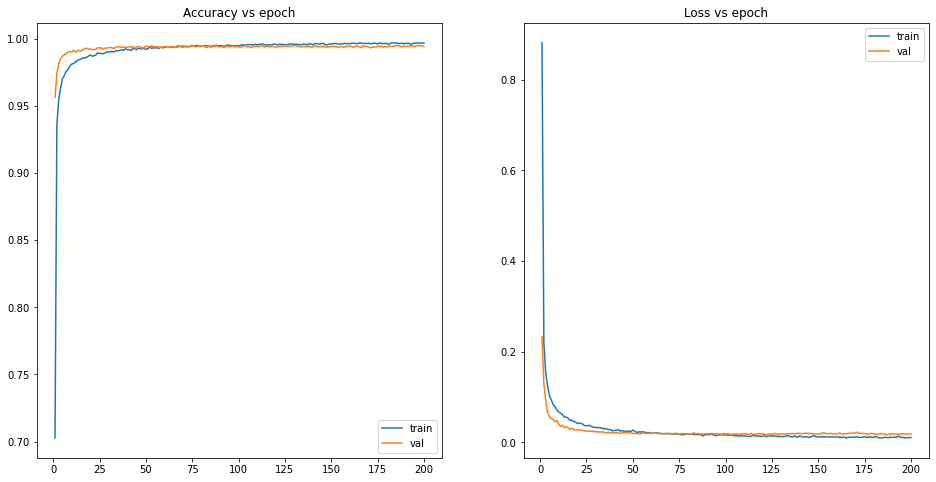

In [13]:
epoch = np.arange(200)+1
#Plot train/validation loss vs epoch
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(epoch, history_dropout_hidden.history['accuracy'])
plt.plot(epoch, history_dropout_hidden.history['val_accuracy'])
plt.title('Accuracy vs epoch')
plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot #####
plt.subplot(122)
plt.plot(epoch, history_dropout_hidden.history['loss'])
plt.plot(epoch, history_dropout_hidden.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [14]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape((data_train.shape[0], data_train.shape[1]*data_train.shape[2]))
data_test_reshape_fcae = data_test.reshape((data_test.shape[0], data_test.shape[1]*data_test.shape[2]))
    
print(np.shape(data_train_reshape_fcae))
print(np.shape(data_test_reshape_fcae))


(60000, 784)
(10000, 784)


In [15]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    model.add(layers.Dense(400, activation='relu',input_shape=(data_train_reshape_fcae.shape[1],)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    #### Fill in the model ####
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))
    # Decoder
    
    #### Fill in the model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='mean_squared_error', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0302 - val_loss: 0.0252
Epoch 2/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0252 - val_loss: 0.0252
Epoch 3/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0266 - val_loss: 0.0272
Epoch 4/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0274 - val_loss: 0.0279
Epoch 5/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0279 - val_loss: 0.0279
Epoch 6/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0279 - val_loss: 0.0279
Epoch 7/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0279 - val_loss: 0.0279
Epoch 8/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0279 - val_loss: 0.0279
Epoch 9/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.02

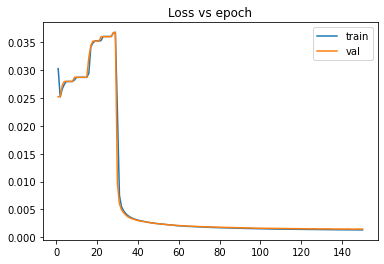

In [16]:
epoch = np.arange(150)+1
#Plot train/validation loss vs epoch
plt.plot(epoch, history_deep_ae.history['loss'])
plt.plot(epoch, history_deep_ae.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')
#### Fill in the plot ####

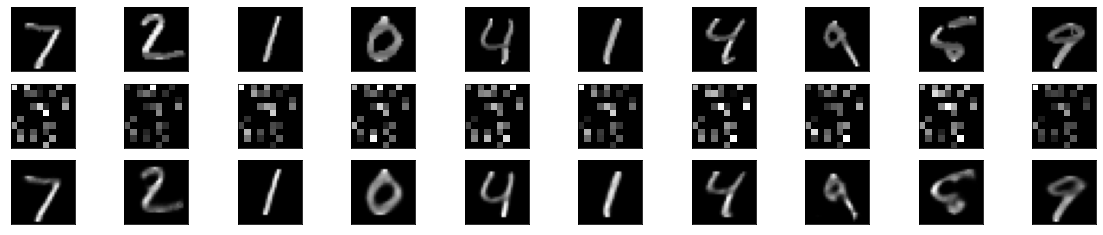

In [17]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Set the dropout rate at 30% if the dropout layer is used (optional, not required).
<br>  Train for 200 epochs**

In [18]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape((data_train.shape[0], data_train.shape[1],data_train.shape[2],1))
data_test_reshape_cae = data_test.reshape((data_test.shape[0], data_test.shape[1],data_test.shape[2],1))

print(np.shape(data_train_reshape_cae))
print(np.shape(data_test_reshape_cae))

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = tf.keras.models.Sequential()

    #Encoder
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape,padding='same')) #1
    #model.add(layers.Dropout(0.3))

    model.add(layers.MaxPooling2D((2, 2))) #2
    
    
    model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same')) #3
    #model.add(layers.Dropout(0.3))
    
    model.add(layers.MaxPooling2D((2, 2))) #4
    
    model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same')) #5
    
    
    
    #### Fill in model ####
    
    #Decoder
    model.add(layers.UpSampling2D((2, 2))) #6
    model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same')) #7
    model.add(layers.UpSampling2D((2, 2))) #8
    model.add(layers.Conv2D(1, (3, 3), activation='relu',padding='same')) # Output
   
    #### Fill in model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mean_squared_error', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=200, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)       

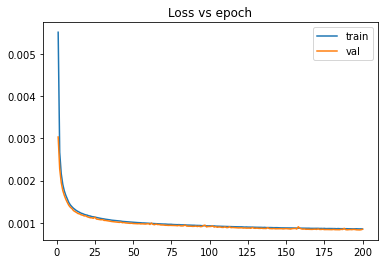

In [20]:
epoch = np.arange(200)+1
#Plot train/validation loss vs epoch
plt.plot(epoch, history_conv_ae.history['loss'])
plt.plot(epoch, history_conv_ae.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')


<Figure size 432x288 with 0 Axes>

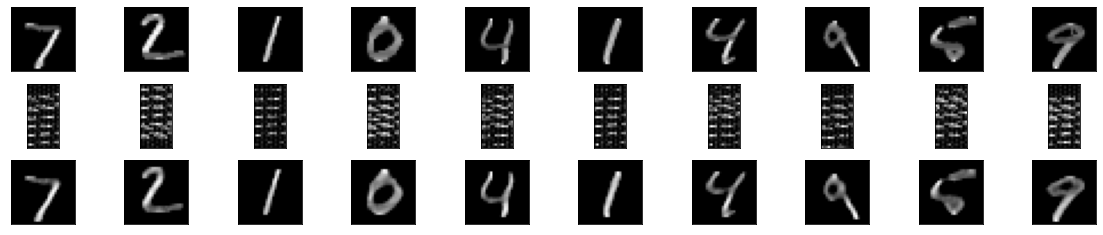

In [21]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [22]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

from tensorflow.keras import losses


import sys
from os import listdir
from os.path import isfile, join

In [23]:
lossMSE = tf.keras.losses.MeanSquaredError()

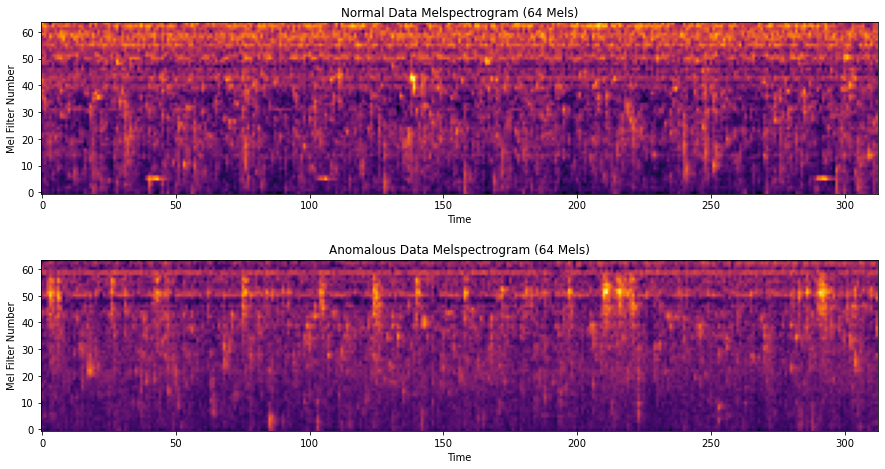

In [24]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [25]:
print(ex_norm.shape)
print(ex_anom.shape)

(8, 64, 313)
(8, 64, 313)


In [33]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
autoencoderBASE = tf.keras.models.Sequential([
    
   #### Fill in your model #####，
    #layers.Cropping2D(cropping=((0, 0), (0, 0)), data_format=None),
    layers.Conv2D(16, (3, 3), activation='relu',padding='same'),#, input_shape=(256,626,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    
    
    # Decoder
    #### Fill in the model ####
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='relu', padding='same'),
    #layers.Reshape( (160256,1)),
])


In [34]:
# Load data
normal_data  = np.load('./training_data.npy')
anomaly_data = np.load('./test_data.npy')

In [35]:
#### General steps to follow
# Set up the data (reshape, scale, etc...
scaler = MinMaxScaler()
normal_data_re = normal_data.reshape(1000,160256)
anomaly_data_re = anomaly_data.reshape(143,160256)
normal_data_scale = scaler.fit_transform(normal_data_re)
anomaly_data_scale = scaler.fit_transform(anomaly_data_re)
normal_data_scale = normal_data_scale.reshape(1000,256,626,1)
test = anomaly_data_scale.reshape(143,256,626,1)
print('Train min=%.3f, max=%.3f' % (normal_data_scale.min(), normal_data_scale.max()))
print('Test min=%.3f, max=%.3f' % (anomaly_data_scale.min(), anomaly_data_scale.max()))
print(normal_data_scale.shape)
print(anomaly_data_scale.shape)

x_train, x_valid= train_test_split(normal_data_scale, test_size=0.3)
# Initialize a loss function
autoencoderBASE.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Compile a model
autoencoderBASE_history = autoencoderBASE.fit(x_train, x_train, validation_data=(x_valid, x_valid), epochs=30, batch_size=70, shuffle=True)
# Train a model

Train min=0.000, max=1.000
Test min=0.000, max=1.000
(1000, 256, 626, 1)
(143, 160256)
Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 [==============================] - 23s 34ms/sample - loss: 0.1431 - accuracy: 0.0663 - val_loss: 0.1028 - val_accuracy: 0.0585
Epoch 2/30
700/700 [==============================] - 21s 30ms/sample - loss: 0.0810 - accuracy: 0.0719 - val_loss: 0.0784 - val_accuracy: 0.0674
Epoch 3/30
700/700 [==============================] - 20s 28ms/sample - loss: 0.0730 - accuracy: 0.0777 - val_loss: 0.0721 - val_accuracy: 0.0849
Epoch 4/30
700/700 [==============================] - 20s 29ms/sample - loss: 0.0691 - accuracy: 0.0875 - val_loss: 0.0680 - val_accuracy: 0.0888
Epoch 5/30
700/700 [==============================] - 20s 29ms/sample - loss: 0.0667 - accuracy: 0.0913 - val_loss: 0.0657 - val_accuracy: 0.0949
Epoch 6/30
700/700 [==============================] - 20s 29ms/sample - loss: 0.0645 - accuracy: 0.0938 - val_loss: 0.0629 - val_accuracy

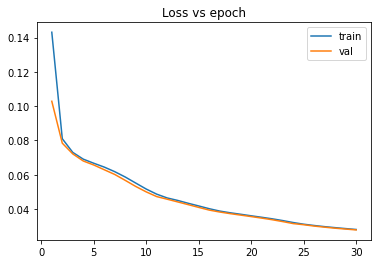

In [36]:
# lossMSE =tf.keras.losses.MSE()

epoch = np.arange(30)+1
#Plot train/validation loss vs epoch
plt.plot(epoch, autoencoderBASE_history.history['loss'])
plt.plot(epoch, autoencoderBASE_history.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')

In [37]:
print(x_train.shape)

(700, 256, 626, 1)


The mean of normal data is 0.0278        and standard deviation is 0.0005


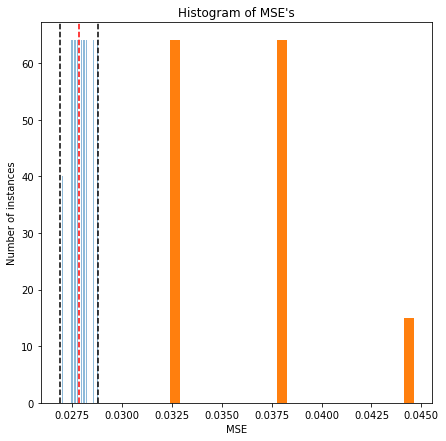

In [38]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((x_train,x_valid))))
for i, batch in dataset.enumerate():
    batch= batch[None, :, :, :] 
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test))
for i, batch in anomset.enumerate():
    batch= batch[None, :, :, :] 
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [39]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
fn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
tn_count = 1000-fp_count
print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')

TP 143 	 TN 936
FP 64 	 FN 0
